<a href="https://colab.research.google.com/github/Sanjayyykumar/Sanjayyykumar/blob/main/SanjayKumarS_YOUTUBE_ADVIEW_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Youtube Adview prediction - submitted by Sanjay kumar S

Firstly - Training the Data set with "train.csv" file

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("train.csv")
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data["category"]=data["category"].map(category)
data.head()

NameError: ignored

In [ ]:
data=data[data.views!='F']
data=data[data.likes!='F']
data=data[data.dislikes!='F']
data=data[data.comment!='F']
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,6
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,4
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,3
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,8
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,4


In [ ]:
data["views"] = pd.to_numeric(data["views"])
data["comment"] = pd.to_numeric(data["comment"])
data["likes"] = pd.to_numeric(data["likes"])
data["dislikes"] = pd.to_numeric(data["dislikes"])
data["adview"]=pd.to_numeric(data["adview"])
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,6
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,4
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,3
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,8
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,4


In [ ]:
from sklearn.preprocessing import LabelEncoder
data['duration']=LabelEncoder().fit_transform(data['duration'])
data['vidid']=LabelEncoder().fit_transform(data['vidid'])
data['published']=LabelEncoder().fit_transform(data['published'])
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,1090,2925,6
1,2741,2,1707,56,2,6,64,3040,4
2,8138,1,2023,25,0,2,122,1863,3
3,9005,6,620860,777,161,153,2088,2546,8
4,122,1,666,1,0,0,2233,1963,4


In [ ]:
import time
import datetime
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data["duration"]=time1
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,1090,457,6
1,2741,2,1707,56,2,6,64,570,4
2,8138,1,2023,25,0,2,122,136,3
3,9005,6,620860,777,161,153,2088,262,8
4,122,1,666,1,0,0,2233,31,4


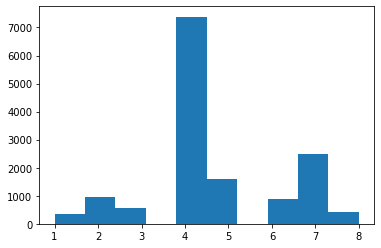

In [ ]:
plt.hist(data["category"])
plt.show()

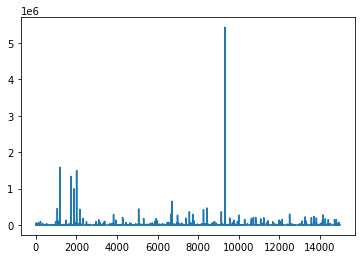

In [ ]:
plt.plot(data["adview"])
plt.show()

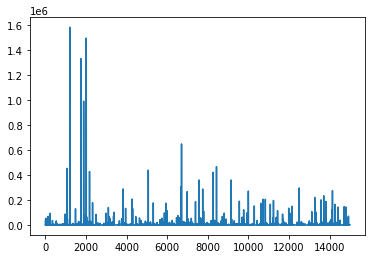

In [ ]:
data=data[data["adview"]<2000000]
plt.plot(data["adview"])
plt.show()

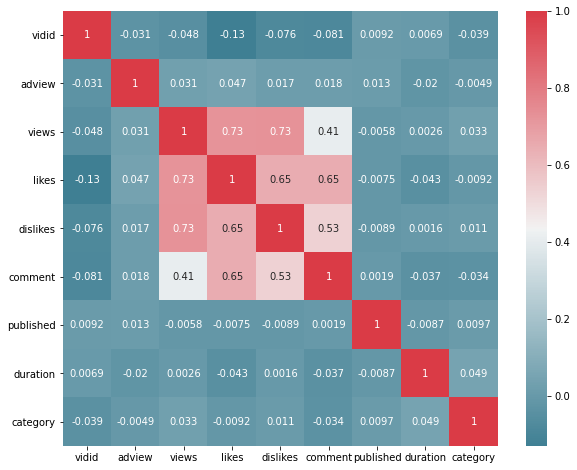

In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [ ]:
Y_train=pd.DataFrame(data=data.iloc[:,1].values,columns=["Target"])
data=data.drop(["vidid"],axis=1)
data=data.drop(["adview"],axis=1)
data.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,1090,457,6
1,1707,56,2,6,64,570,4
2,2023,25,0,2,122,136,3
3,620860,777,161,153,2088,262,8
4,666,1,0,0,2233,31,4


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,Y_train,test_size=0.2,random_state=42)
x_train.describe()
x_test.shape

(2928, 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
x_train=MinMaxScaler().fit_transform(x_train)
x_test=MinMaxScaler().fit_transform(x_test)
x_train.mean()
x_test

array([[7.17372469e-03, 8.63080853e-03, 3.31069610e-03, ...,
        4.13271735e-01, 1.32738468e-02, 4.28571429e-01],
       [3.43438476e-06, 1.06225336e-05, 0.00000000e+00, ...,
        5.15749685e-01, 3.68717968e-04, 5.71428571e-01],
       [4.17243632e-04, 7.32954817e-04, 1.13186191e-04, ...,
        2.77614448e-01, 3.31477453e-02, 1.42857143e-01],
       ...,
       [9.69235691e-04, 1.32781670e-04, 3.39558574e-04, ...,
        7.42965141e-01, 1.48593341e-02, 5.71428571e-01],
       [7.67152853e-04, 3.67008535e-03, 5.37634409e-04, ...,
        2.21755565e-01, 1.32001032e-02, 4.28571429e-01],
       [2.63138694e-03, 1.20034629e-03, 8.20599887e-04, ...,
        9.65560689e-01, 2.49990782e-02, 5.71428571e-01]])

In [ ]:
from sklearn import metrics
def print_error(x_test, y_test, model_name):
  prediction = model_name.predict(x_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train, y_train)
print_error(x_test,y_test, linear_regression)

Mean Absolute Error: 3493.3179717888065
Mean Squared Error: 838355049.0604035
Root Mean Squared Error: 28954.361485973117


In [ ]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(x_train,y_train)
print_error(x_test,y_test, linear_regression)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3493.3179717888065
Mean Squared Error: 838355049.0604035
Root Mean Squared Error: 28954.361485973117


In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
print_error(x_test,y_test, decision_tree)

Mean Absolute Error: 5604.691256830601
Mean Squared Error: 4629671621.182377
Root Mean Squared Error: 68041.69031691068


In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(x_train,y_train)
print_error(x_test,y_test, random_forest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 3349.8767869789635
Mean Squared Error: 861106786.3479174
Root Mean Squared Error: 29344.621080326073


In [ ]:
# Artificial Neural Network
import keras
import tensorflow as tf
from keras.layers import Dense 
ann = keras.models.Sequential([Dense(6, activation="relu",
                              input_shape=x_train.shape[1: ]),
                              Dense(6,activation="relu"),
                              Dense(1)])
optimizer= tf.keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(x_train,y_train,epochs=100)
ann.summary()
print_error(x_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 1s 1ms/step - loss: 767406272.0000 - mean_squared_error: 767406272.0000
Epoch 2/100
366/366 [==============================] - 0s 1ms/step - loss: 767401408.0000 - mean_squared_error: 767401408.0000
Epoch 3/100
366/366 [==============================] - 0s 1ms/step - loss: 767390720.0000 - mean_squared_error: 767390720.0000
Epoch 4/100
366/366 [==============================] - 0s 1ms/step - loss: 767369792.0000 - mean_squared_error: 767369792.0000
Epoch 5/100
366/366 [==============================] - 0s 1ms/step - loss: 767339264.0000 - mean_squared_error: 767339264.0000
Epoch 6/100
366/366 [==============================] - 0s 1ms/step - loss: 767295488.0000 - mean_squared_error: 767295488.0000
Epoch 7/100
366/366 [==============================] - 0s 1ms/step - loss: 767237888.0000 - mean_squared_error: 767237888.0000
Epoch 8/100
366/366 [==============================] - 0s 1ms/step - loss: 767170176.0000 - mean_squared_error:

In [ ]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

['decisiontree_youtubeadview.pkl']

Testing using "test.csv" file

In [ ]:
#testing
testdata=pd.read_csv("test.csv")
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
testdata["category"]=testdata["category"].map(category)
testdata=testdata.drop(["vidid"],axis=1)
testdata.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,18-02-2017,PT7M29S,2
1,1040132,8171,340,1047,28-06-2016,PT6M29S,6
2,28534,31,11,1,10-03-2014,PT37M54S,4
3,1316715,2284,250,274,05-06-2010,PT9M55S,7
4,1893173,2519,225,116,03-09-2016,PT3M8S,2


In [ ]:
testdata=testdata[testdata.views!='F']
testdata=testdata[testdata.likes!='F']
testdata=testdata[testdata.dislikes!='F']
testdata=testdata[testdata.comment!='F']
testdata.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,18-02-2017,PT7M29S,2
1,1040132,8171,340,1047,28-06-2016,PT6M29S,6
2,28534,31,11,1,10-03-2014,PT37M54S,4
3,1316715,2284,250,274,05-06-2010,PT9M55S,7
4,1893173,2519,225,116,03-09-2016,PT3M8S,2


In [ ]:
testdata["views"] = pd.to_numeric(testdata["views"])
testdata["comment"] = pd.to_numeric(testdata["comment"])
testdata["likes"] = pd.to_numeric(testdata["likes"])
testdata["dislikes"] = pd.to_numeric(testdata["dislikes"])
testdata.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,18-02-2017,PT7M29S,2
1,1040132,8171,340,1047,28-06-2016,PT6M29S,6
2,28534,31,11,1,10-03-2014,PT37M54S,4
3,1316715,2284,250,274,05-06-2010,PT9M55S,7
4,1893173,2519,225,116,03-09-2016,PT3M8S,2


In [ ]:
testdata['duration']=LabelEncoder().fit_transform(testdata['duration'])

In [ ]:
testdata['published']=LabelEncoder().fit_transform(testdata['published'])
testdata.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,1186,2115,2
1,1040132,8171,340,1047,1898,2055,6
2,28534,31,11,1,634,1506,4
3,1316715,2284,250,274,307,2265,7
4,1893173,2519,225,116,187,1625,2


In [ ]:
test=pd.read_csv("test.csv")
mp = pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
testdata["duration"]=time1
testdata.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,1186,449,2
1,1040132,8171,340,1047,1898,389,6
2,28534,31,11,1,634,2274,4
3,1316715,2284,250,274,307,595,7
4,1893173,2519,225,116,187,188,2


In [ ]:
testdata=MinMaxScaler().fit_transform(testdata)

In [ ]:
result=decision_tree.predict(testdata)
result=list(result)
len(result)

8549

In [ ]:
import csv
with open('Predictions_Submission.csv','w',newline='') as f:
  filenames=['Adview_Predictions']
  thewriter=csv.DictWriter(f,fieldnames=filenames)
  thewriter.writeheader()
  for i in range(0,len(result)):
    thewriter.writerow({'Adview_Predictions':str(result[i])})